In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurement.date)).first()
most_recent_date

('2017-08-23',)

In [39]:
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1460e300730>,
 'longitude': -157.8168,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0}

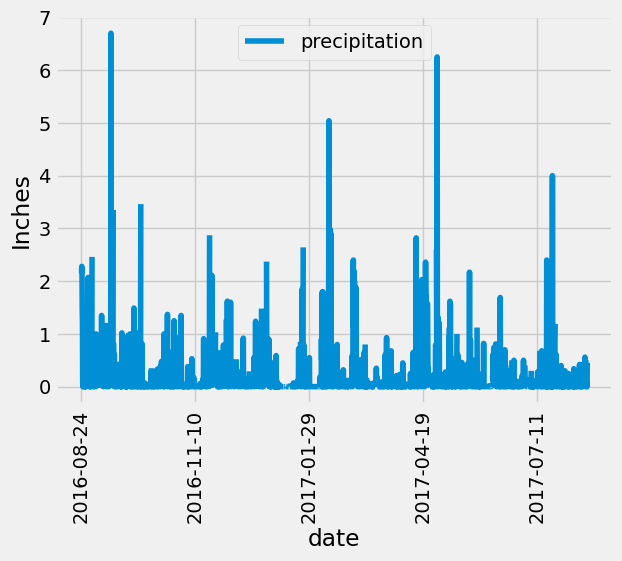

In [66]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = dt.datetime.strptime('2017-08-23', '%Y-%m-%d')
year_ago = last_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(rot=90)
ax.set_ylabel('Inches')
plt.show()


In [38]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(station.station)).all()
total_stations

[(9,)]

In [49]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).first()
most_active_station[0]

'USC00519281'

In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == most_active_station[0]).scalar()

highest_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == most_active_station[0]).scalar()

avg_temp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == most_active_station[0]).scalar()

print(f"Lowest temperature at {most_active_station[0]} is {lowest_temp}")
print(f"Highest temperature at {most_active_station[0]} is {highest_temp}")
print(f"Average temperature at {most_active_station[0]} is {avg_temp}")

Lowest temperature at USC00519281 is 54.0
Highest temperature at USC00519281 is 85.0
Average temperature at USC00519281 is 71.66378066378067


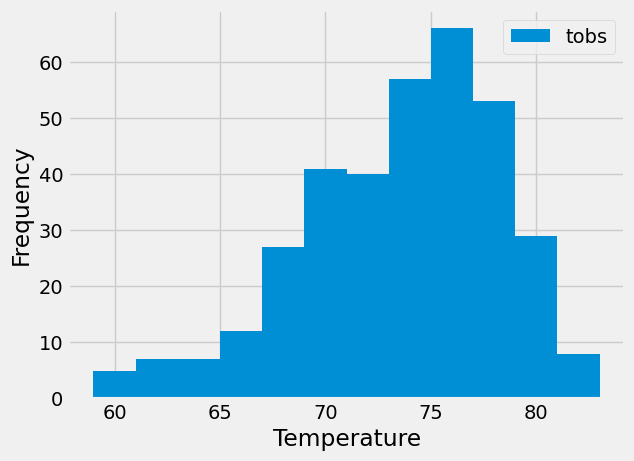

In [68]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_results = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= '2016-08-23').all()

# Converting results to dataframe
df = pd.DataFrame(station_results, columns=['tobs'])

# Plotting histogram
ax = df.plot.hist(bins=12)
ax.set_xlabel('Temperature')
plt.show()

# Close session

In [69]:
# Close Session
session.close()